In [35]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [36]:
df = pd.read_csv('E:\Rohan\Datasets\Digital Cognition Internship\Marketing Mix Modelling\Credit.csv')

In [37]:
df = df.iloc[:,1:]
df

,Income,Limit,Rating,Cards,Age,Education,Gender,Student,Married,Ethnicity,Balance
0,14.891,3606,283,2,34,11,Male,No,Yes,Caucasian,333
1,106.025,6645,483,3,82,15,Female,Yes,Yes,Asian,903
2,104.593,7075,514,4,71,11,Male,No,No,Asian,580
3,148.924,9504,681,3,36,11,Female,No,No,Asian,964
4,55.882,4897,357,2,68,16,Male,No,Yes,Caucasian,331
...,...,...,...,...,...,...,...,...,...,...,...
395,12.096,4100,307,3,32,13,Male,No,Yes,Caucasian,560
396,13.364,3838,296,5,65,17,Male,No,No,African American,480
397,57.872,4171,321,5,67,12,Female,No,Yes,Caucasian,138
398,37.728,2525,192,1,44,13,Male,No,Yes,Caucasian,0


In [38]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

est = smf.ols('Balance ~ Gender', df).fit()  #Ordinary Least Squares
est.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                Balance   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.002
Method:                 Least Squares   F-statistic:                    0.1836
Date:                Sat, 06 Jun 2020   Prob (F-statistic):              0.669
Time:                        01:59:41   Log-Likelihood:                -3019.3
No. Observations:                 400   AIC:                             6043.
Df Residuals:                     398   BIC:                             6051.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept          509.8031     33.128     15.389      0.000     444.675     574.931
Gender[T.Female]    19.7331     46.051      0.429      0.669     -70.801     110.267
==============================================================================
Omnibus:                       28.438   Durbin-Watson:                   1.940
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               27.346
Skew:                           0.583   Prob(JB):                     1.15e-06
Kurtosis:                       2.471   Cond. No.                         2.66
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [39]:
df['Ethnicity'].value_counts()

Caucasian           199
Asian               102
African American     99
Name: Ethnicity, dtype: int64

In [40]:
est_mul = smf.ols('Balance ~ Ethnicity', df).fit()  #Ordinary Least Squares
est_mul.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                Balance   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.005
Method:                 Least Squares   F-statistic:                   0.04344
Date:                Sat, 06 Jun 2020   Prob (F-statistic):              0.957
Time:                        01:59:42   Log-Likelihood:                -3019.3
No. Observations:                 400   AIC:                             6045.
Df Residuals:                     397   BIC:                             6057.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept                531.0000     46.319     11.464      0.000     439.939     622.061
Ethnicity[T.Asian]       -18.6863     65.021     -0.287      0.774    -146.515     109.142
Ethnicity[T.Caucasian]   -12.5025     56.681     -0.221      0.826    -123.935      98.930
==============================================================================
Omnibus:                       28.829   Durbin-Watson:                   1.946
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               27.395
Skew:                           0.581   Prob(JB):                     1.13e-06
Kurtosis:                       2.460   Cond. No.                         4.39
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Intercept is considered for African American. Rest B0 & B1 is for Asian & Caucasian respectively.
It says that the average balance for an african american would be the intercept,i.e, 531.
While for asian it would be 18 units less, and for caucasian 12 units less. Howeever there is no proof for this as it s having p-values really high. Hence no statistical evidence to support it

F statistic is 0.957, which is pretty close to 1. Hence if we had considered hypothesis testing, we would have failed to reject a null hypothesis about the relationship between ethnicity & balance, i.e, There may be no relation between them

In [41]:
est_mul_1 = smf.ols('Balance ~ Student + Ethnicity', df).fit()  #Ordinary Least Squares
est_mul_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                Balance   R-squared:                       0.068
Model:                            OLS   Adj. R-squared:                  0.061
Method:                 Least Squares   F-statistic:                     9.583
Date:                Sat, 06 Jun 2020   Prob (F-statistic):           4.02e-06
Time:                        01:59:42   Log-Likelihood:                -3005.3
No. Observations:                 400   AIC:                             6019.
Df Residuals:                     396   BIC:                             6035.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept                490.7757     45.411     10.807      0.000     401.499     580.053
Student[T.Yes]           398.2206     74.391      5.353      0.000     251.970     544.471
Ethnicity[T.Asian]       -29.2156     62.899     -0.464      0.643    -152.873      94.442
Ethnicity[T.Caucasian]    -6.2971     54.817     -0.115      0.909    -114.065     101.471
==============================================================================
Omnibus:                       20.962   Durbin-Watson:                   1.952
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               21.989
Skew:                           0.544   Prob(JB):                     1.68e-05
Kurtosis:                       2.633   Cond. No.                         4.42
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [42]:
est_mul_2= smf.ols('Balance ~ Income + Student + Income*Student',data=df).fit()
est_mul_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                Balance   R-squared:                       0.280
Model:                            OLS   Adj. R-squared:                  0.274
Method:                 Least Squares   F-statistic:                     51.30
Date:                Sat, 06 Jun 2020   Prob (F-statistic):           4.94e-28
Time:                        01:59:42   Log-Likelihood:                -2953.7
No. Observations:                 400   AIC:                             5915.
Df Residuals:                     396   BIC:                             5931.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept               200.6232     33.698      5.953      0.000     134.373     266.873
Student[T.Yes]          476.6758    104.351      4.568      0.000     271.524     681.827
Income                    6.2182      0.592     10.502      0.000       5.054       7.382
Income:Student[T.Yes]    -1.9992      1.731     -1.155      0.249      -5.403       1.404
==============================================================================
Omnibus:                      107.788   Durbin-Watson:                   1.952
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               22.158
Skew:                           0.228   Prob(JB):                     1.54e-05
Kurtosis:                       1.941   Cond. No.                         309.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [43]:
df['Student2'] = df.Student.map({'No':0, 'Yes':1})
est1 = smf.ols('Balance ~ Income + Student2', df).fit()
param_no_interaction = est1.params


print('Regression 1 - without interaction term')
print(param_no_interaction)


Regression 1 - without interaction term
Intercept    211.142964
Income         5.984336
Student2     382.670539
dtype: float64


Text(0, 0.5, 'Balance')

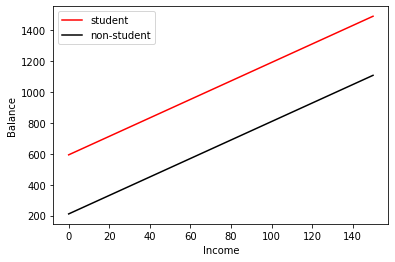

In [44]:
# Income (x-axis)
income = np.linspace(0,150)

# Balance without interaction term (y-axis)
student1 = np.linspace(param_no_interaction['Intercept']+param_no_interaction['Student2'],
                       param_no_interaction['Intercept']+param_no_interaction['Student2']+150*param_no_interaction['Income'])
non_student1 =  np.linspace(param_no_interaction['Intercept'], param_no_interaction['Intercept']+150*param_no_interaction['Income'])


# Create plot
fig, ax1 = plt.subplots()
ax1.plot(income, student1, 'r', income, non_student1, 'k')


ax1.legend(['student', 'non-student'], loc=2)
ax1.set_xlabel('Income')
ax1.set_ylabel('Balance')


Balance for students (red line) & non students (black line)

The equation for balance (Y) is ---> 

  Y = B1 * income + (B0 + B2)      --> (B0 + B2) if person is student==1      (RED)
  
  Y = B1 * income + (B0)           --> (B0) if person is student==0           (BLACK)
  
  B1 is slope for the left diagram which is same for both


The fact that the lines
are parallel means that the average effect on balance of a one-unit increase
in income does not depend on whether or not the individual is a student, but actually , it does.

Hence to tackle this problem, we refer to an interaction term between Income & Student


Regression 2 - with interaction term
Intercept          200.623153
Income               6.218169
Student2           476.675843
Income:Student2     -1.999151
dtype: float64


Text(0, 0.5, 'Balance')

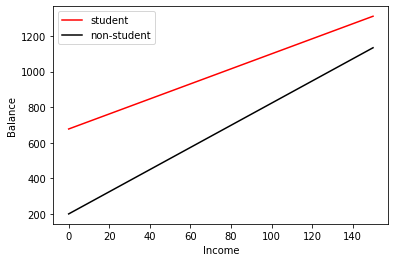

In [45]:
est2 = smf.ols('Balance ~ Income + Income*Student2', df).fit()
param_interaction = est2.params

print('\nRegression 2 - with interaction term')
print(param_interaction)



# Balance with iteraction term (y-axis)
student2 = np.linspace(param_interaction['Intercept']+param_interaction['Student2'],
                       param_interaction['Intercept']+param_interaction['Student2']+
                       150*(param_interaction['Income']+param_interaction['Income:Student2']))

non_student2 =  np.linspace(param_interaction['Intercept'], param_interaction['Intercept']+150*param_interaction['Income'])

fig, ax2 = plt.subplots()
ax2.plot(income, student2, 'r', income, non_student2, 'k')
ax2.legend(['student', 'non-student'], loc=2)
ax2.set_xlabel('Income')
ax2.set_ylabel('Balance')


Balance for students (red line) & non students (black line)

The equation for balance (Y) is ---> 

  Y = (B1+B3) * income + (B0 + B2)      --> (B0 + B2) if person is student==1      (RED)
  
  Y = B1 * income + (B0)           --> (B0) if person is not student==0           (BLACK)
  
  B1 is slope for the left diagram which is same for both


This allows for
the possibility that changes in income may affect the credit card balances
of students and non-students differently.

We note that the slope for students
is lower than the slope for non-students. 

Income increases comparitively more for non-students when their Credit Card Balance increases, in compared to the increase in credit card balance for students.

## Collinearity

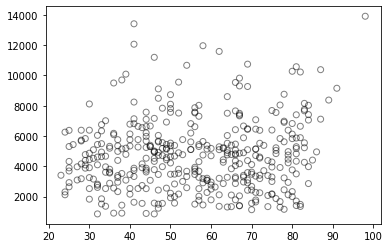

In [46]:
plt.scatter(df['Age'] , df['Limit'],facecolors='None', edgecolors='black', alpha=.5)

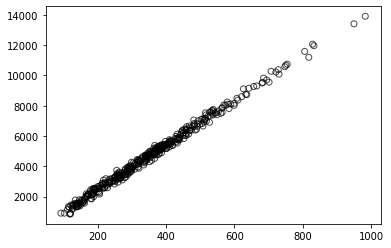

In [47]:
plt.scatter(df['Rating'],df['Limit'],facecolor='None', edgecolors='black' ,alpha=0.7)

In [48]:
df[['Rating','Limit']].corr()

,Rating,Limit
Rating,1.00000,0.99688
Limit,0.99688,1.00000


Quite a lot 

The presence of collinearity can pose problems in
the regression context, since it can be difficult to separate out the individual
effects of collinear variables on the response. In other words, since
limit and rating tend to increase or decrease together, it can be difficult to
determine how each one separately is associated with the response, balance

In [49]:
est_mul_1 = smf.ols('Balance ~ Age + Limit',df).fit()
est_mul_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                Balance   R-squared:                       0.750
Model:                            OLS   Adj. R-squared:                  0.749
Method:                 Least Squares   F-statistic:                     595.0
Date:                Sat, 06 Jun 2020   Prob (F-statistic):          3.52e-120
Time:                        01:59:43   Log-Likelihood:                -2742.2
No. Observations:                 400   AIC:                             5490.
Df Residuals:                     397   BIC:                             5502.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   -173.4109     43.828     -3.957      0.000    -259.576     -87.246
Age           -2.2915      0.672     -3.407      0.001      -3.614      -0.969
Limit          0.1734      0.005     34.496      0.000       0.163       0.183
==============================================================================
Omnibus:                       19.180   Durbin-Watson:                   1.951
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               27.162
Skew:                           0.382   Prob(JB):                     1.26e-06
Kurtosis:                       4.022   Cond. No.                     2.00e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large,  2e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [50]:
est_mul_2 = smf.ols('Balance ~ Limit + Rating',df).fit()
est_mul_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                Balance   R-squared:                       0.746
Model:                            OLS   Adj. R-squared:                  0.745
Method:                 Least Squares   F-statistic:                     582.8
Date:                Sat, 06 Jun 2020   Prob (F-statistic):          7.57e-119
Time:                        01:59:44   Log-Likelihood:                -2745.3
No. Observations:                 400   AIC:                             5497.
Df Residuals:                     397   BIC:                             5509.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   -377.5368     45.254     -8.343      0.000    -466.505    -288.569
Limit          0.0245      0.064      0.384      0.701      -0.101       0.150
Rating         2.2017      0.952      2.312      0.021       0.330       4.074
==============================================================================
Omnibus:                       23.153   Durbin-Watson:                   1.964
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               38.187
Skew:                           0.394   Prob(JB):                     5.10e-09
Kurtosis:                       4.293   Cond. No.                     2.06e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.06e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

the collinearity between limit and rating has caused
the standard error for the limit coefficient estimate to increase by a factor
of 12 and the p-value to increase to 0.701. In other words, the importance
of the limit variable has been masked due to the presence of collinearity.
To avoid such a situation, it is desirable to identify and address potential
collinearity problems while fitting the model.

To Tackle MULTIcollinearity, we use variance inflation factor (VIF).

 The VIF is
variance
inflation
factor
the ratio of the variance of ˆβj when fitting the full model divided by the
variance of ˆβj if fit on its own.

In [61]:
est_mul_3 = smf.ols('Age ~ Rating + Limit',df).fit()
est_mul_4 = smf.ols('Rating ~ Age + Limit',df).fit()
est_mul_5 = smf.ols('Limit ~ Age + Rating',df).fit()
est_mul_3.summary()
print(1/(1-est_mul_3.rsquared))
print(1/(1-est_mul_4.rsquared))
print(1/(1-est_mul_5.rsquared))

1.0113846860681328
160.66830095856935
160.59287978597942


Here we testing the MULTIcollinearity of three variables---> Age, Rating, Limit

The smallest possible value for VIF is 1,
which indicates the complete absence of collinearity

In [65]:
df[['Age','Limit']].corr()


,Age,Limit
Age,1.000000,0.100888
Limit,0.100888,1.000000
